# 2. EDA

This section regards the Explanatory Data Analysis, which consists in different parts:
- basic EDA on features
- insights on reviews and time periods
- sentiment - review relationship
- WordClouds
- N-gram analysis

In [36]:
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk import FreqDist
from nltk.util import ngrams

In [37]:
pd.set_option("max_colwidth", None)
plt.style.use('ggplot')

In [38]:
df = pd.read_csv('G:/Il mio Drive/MAGISTRALE/IT Coding/Project/Sentiment-Analysis-on-Amazon-product-reviews/Data/clean_reviews.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head(3)

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day
0,good sound seem decent build quality good sound happy purchase,good sound. seem decent build quality and good sound. very happy with purchase.,good sound,seem decent build quality and good sound. very happy with purchase.,5,Positive,2023,5,28
1,not realise bad audio setup considering used quite respectable setup many years ago feel trap using bluetooth speakers leave lot desired price provide perfect audio experience filling 3x3m room hardly auditorium quality amazing feel like subwoofer genres average listening experience without neighbours complaining beautiful almost brings tear eye,"i didn't realise how bad my audio setup was. considering i used to have quite a respectable setup many years ago i've feel into a trap of using bluetooth speakers which leave a lot to be desired. for the price these provide a perfect audio experience. now i'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. i do feel like i could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. almost brings a tear to my eye.",i didn't realise how bad my audio setup was,"considering i used to have quite a respectable setup many years ago i've feel into a trap of using bluetooth speakers which leave a lot to be desired. for the price these provide a perfect audio experience. now i'm only filling a 3x3m room so hardly an auditorium but the quality is amazing. i do feel like i could do with a subwoofer for some genres but for the average listening experience, without the neighbours complaining, it's beautiful. almost brings a tear to my eye.",5,Positive,2023,5,27
2,beauty love compact shape sound,its a beauty. love its compact shape and sound,its a beauty,love its compact shape and sound,5,Positive,2023,5,26


- Review: title + content to maintain context and syntax
- Clean review: it is the Review column without emoticons, punctuation, special characters and most importantly without stopwords

## Exploratory Data Analysis

### Basic and quick EDA on some features

In [39]:
# column types
df.dtypes

Clean Review    object
Review          object
Title           object
Content         object
Rating           int64
Sentiment       object
Year             int64
Month            int64
Day              int64
dtype: object

In [40]:
# NA check
df.isna().sum()

Clean Review    0
Review          0
Title           0
Content         9
Rating          0
Sentiment       0
Year            0
Month           0
Day             0
dtype: int64

Looks like that with the .to_csv() conversion the empty contents are now Missing values. This does not bother me since my interested columns are Reviews and Clean Reviews, replacing the missing values with simply the title.

In [41]:
df[df['Content'].isna()]

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day
12,great deal,great deal..,great deal.,NaN,5,Positive,2023,5,7
53,impressive,impressive.,impressive,NaN,5,Positive,2023,3,4
78,loud clear audio,"loud, and very clear audio.","loud, and very clear audio",NaN,5,Positive,2022,12,29
167,awesome general balanced sound,awesome! general balanced sound!.,awesome! general balanced sound!,NaN,5,Positive,2022,6,24
291,great job presonus,great job presonus.,great job presonus,NaN,5,Positive,2021,10,29
296,amazing,amazing.,amazing,NaN,5,Positive,2021,10,17
387,best speakers ever owned,the best speakers i have ever owned.,the best speakers i have ever owned,NaN,5,Positive,2021,4,12
563,amazing sound best ever heard,amazing sound. best i have ever heard.,amazing sound. best i have ever heard,NaN,5,Positive,2020,5,7
601,good quality,good quality.,good quality,NaN,3,Neutral,2020,2,14


Looks like for the rest we have 0 missing values.

In [42]:
for col in df.columns:
    display(pd.DataFrame(df[col].describe()))
    print("\n")

,Clean Review
count,740
unique,739
top,excellent excellent
freq,2


,Review
count,740
unique,739
top,excellent. excellent
freq,2


,Title
count,740
unique,653
top,five stars
freq,9


,Content
count,731
unique,728
top,great product
freq,3


,Rating
count,740.000000
mean,4.481081
std,1.100335
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


,Sentiment
count,740
unique,3
top,Positive
freq,643


,Year
count,740.000000
mean,2020.718919
std,1.680717
min,2014.000000
25%,2020.000000
50%,2021.000000
75%,2022.000000
max,2023.000000


,Month
count,740.000000
mean,6.325676
std,3.560517
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,12.000000


,Day
count,740.000000
mean,15.406757
std,8.798032
min,1.000000
25%,8.000000
50%,15.000000
75%,23.000000
max,31.000000


On a total of 740 reviews, We have 653 unique titles and 728 unique review contents. The value **top** and **freq** in the categorical features describe() dataframes indicate the most frequent value and its frequency. Basically **'five Stars'** appears 9 times in the Title column.

In [43]:
# checking relative frequencies for each sentiment
df['Sentiment'].value_counts()/df.shape[0]

Positive    0.868919
Negative    0.089189
Neutral     0.041892
Name: Sentiment, dtype: float64

### Insights on reviews and time periods

In these next graphs I will present the number of reviews along with their sentiment for each year, month and day. To make these histograms i grouped the review counts by year, month and day to then plot each value.

I assume that there will be no correlation between the time period and the sentiment, therefore the most impactful plots will be the first 3.

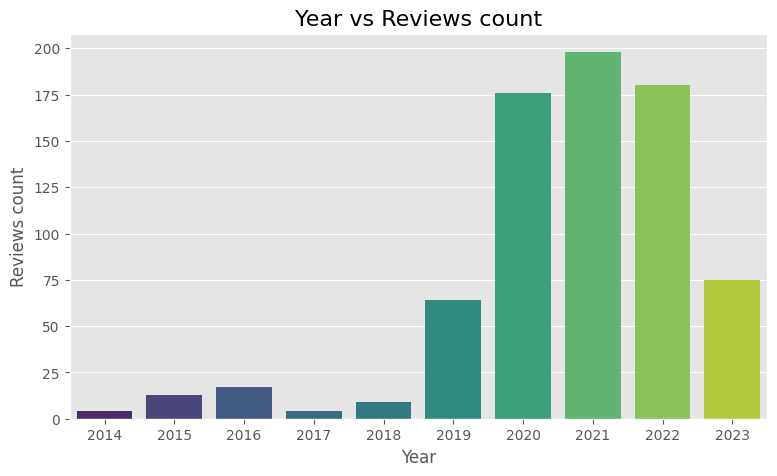

In [44]:
plt.figure(figsize=(9, 5))

year = pd.DataFrame(df.groupby('Year')['Review'].count()).reset_index()
year['Year'] = year['Year'].astype('int64')
year.sort_values(by=['Year'])

sns.barplot(x="Year", y="Review", data=year, palette='viridis', estimator=sum)      #sum for counting
plt.title('Year vs Reviews count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.show()

From this barplot we deduct that the boom of the product has been between 2019 and 2020, even if there were some reviews from 2014 onwards. Obviously the 2023 reviews are much less than the other recent years.

Also, as a home product, the speakers saw an exponential increase in sales maybe due to the COVID-19 pandemic, and this led also to more reviews.

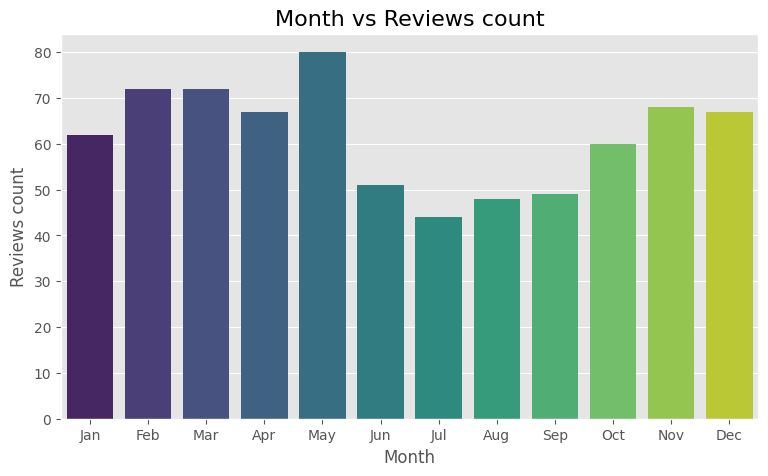

In [45]:
plt.figure(figsize=(9, 5))

month = pd.DataFrame(df.groupby('Month')['Review'].count()).reset_index()
month['Month'] = month['Month'].astype('int64')
month.sort_values(by=['Month'])
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.barplot(x="Month", y="Review", data=month, palette='viridis')
plt.title('Month vs Reviews count', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.xticks(range(len(month_labels)), month_labels)      # to put the labels
plt.show()

Looks like there tends to be less reviews during summer time!

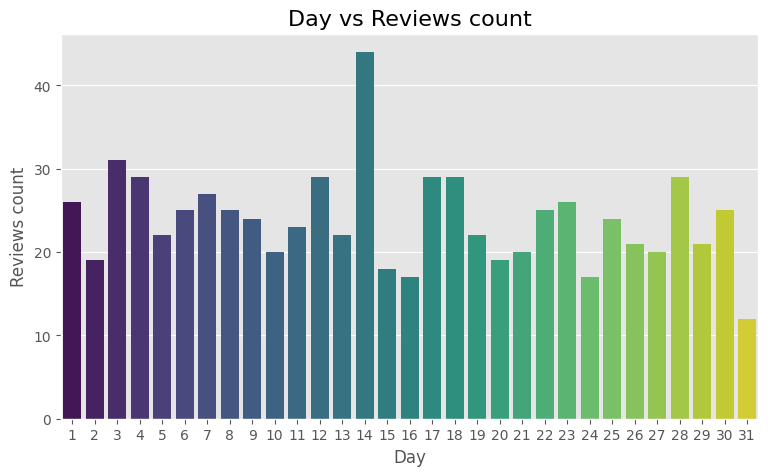

In [46]:
plt.figure(figsize=(9, 5))
day = pd.DataFrame(df.groupby('Day')['Review'].count()).reset_index()

sns.barplot(x="Day", y="Review", data=day, palette='viridis')
plt.title('Day vs Reviews count', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.show()

The review counts are more or less uniformly distributed, unless from the day 14 of the month. There isn't that much variance between the days. But there is a for sure a little drop at the end of month.

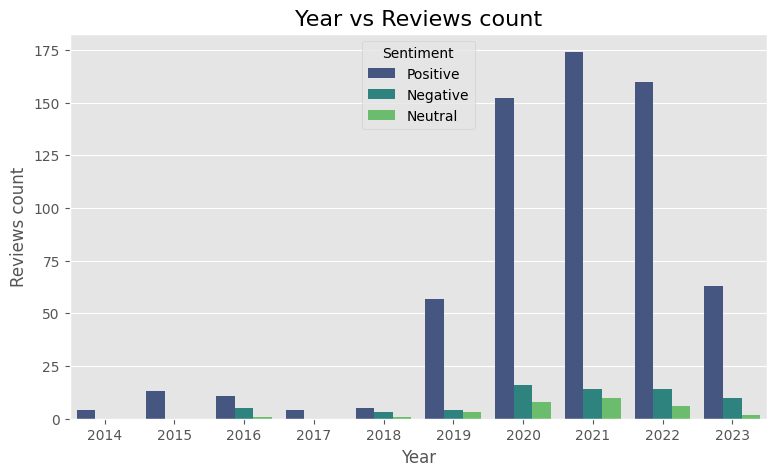

In [47]:
plt.figure(figsize=(9, 5))
Year = pd.DataFrame(df.groupby(['Year', 'Sentiment'])['Review'].count()).reset_index()

sns.barplot(x="Year", y="Review", hue='Sentiment', data=Year, palette='viridis')
plt.title('Year vs Reviews count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.show()

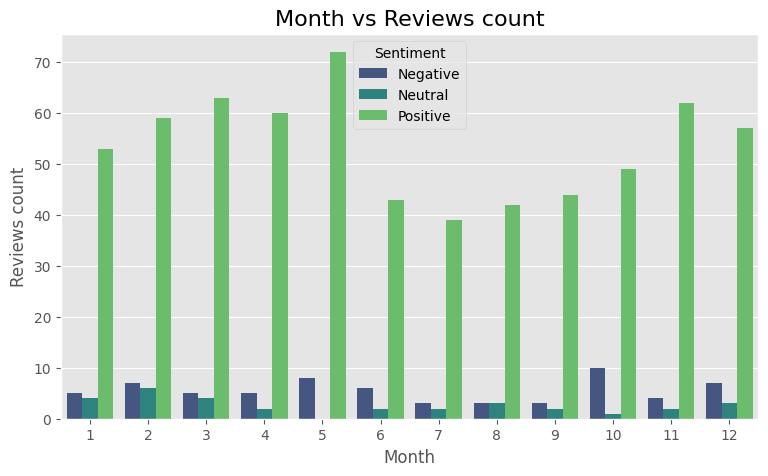

In [48]:
plt.figure(figsize=(9, 5))
Month = pd.DataFrame(df.groupby(['Month', 'Sentiment'])['Review'].count()).reset_index()

sns.barplot(x="Month", y="Review", hue='Sentiment', data=Month, palette='viridis')
plt.title('Month vs Reviews count', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.show()

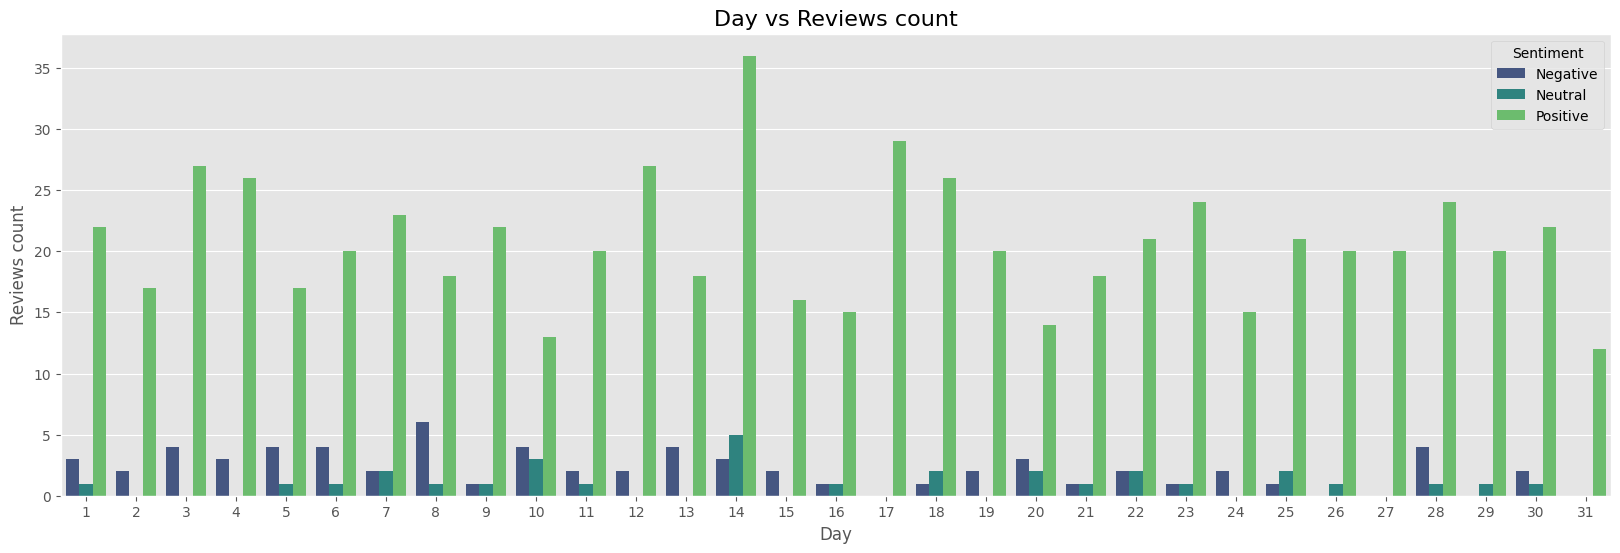

In [49]:
plt.figure(figsize=(20, 6))
day = pd.DataFrame(df.groupby(['Day', 'Sentiment'])['Review'].count()).reset_index()

sns.barplot(x="Day", y="Review", hue='Sentiment', data=day, palette='viridis')
plt.title('Day vs Reviews count', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Reviews count', fontsize=12)
plt.show()

These plots confirm my initial assumption, showing that there is absolutely no correlation between the review's sentiment and the time in which the user writes the feedback.

### Sentiment - Review Relationship

I assume to find longer reviews for higher polarities: it means that a higly satisfied customer is more incline of writing a long and positive review, and the same thing for a customer which is highly unsatistifed with the product. This section is important since I will also add some more features.

Let's see if my assumption is right.

Let's also investigate for which positive reviews the polarity is negative and viceversa (most likely ironic reviews).

**New features:**
- Polarity: Using TextBlob for figuring out the rate of sentiment. It is between [-1,1] where -1 is negative and 1 is positive polarity
- Review length: length of the review, which includes each letters and spaces
- Word length: how many words are there in every review (including emoticons and punctuation)

In [50]:
# TB = TextBlob Polarity
df['TB Polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['Review Length'] = df['Review'].astype(str).apply(len)
df['Word Count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [51]:
df.head(1)

,Clean Review,Review,Title,Content,Rating,Sentiment,Year,Month,Day,TB Polarity,Review Length,Word Count
0,good sound seem decent build quality good sound happy purchase,good sound. seem decent build quality and good sound. very happy with purchase.,good sound,seem decent build quality and good sound. very happy with purchase.,5,Positive,2023,5,28,0.561111,79,13


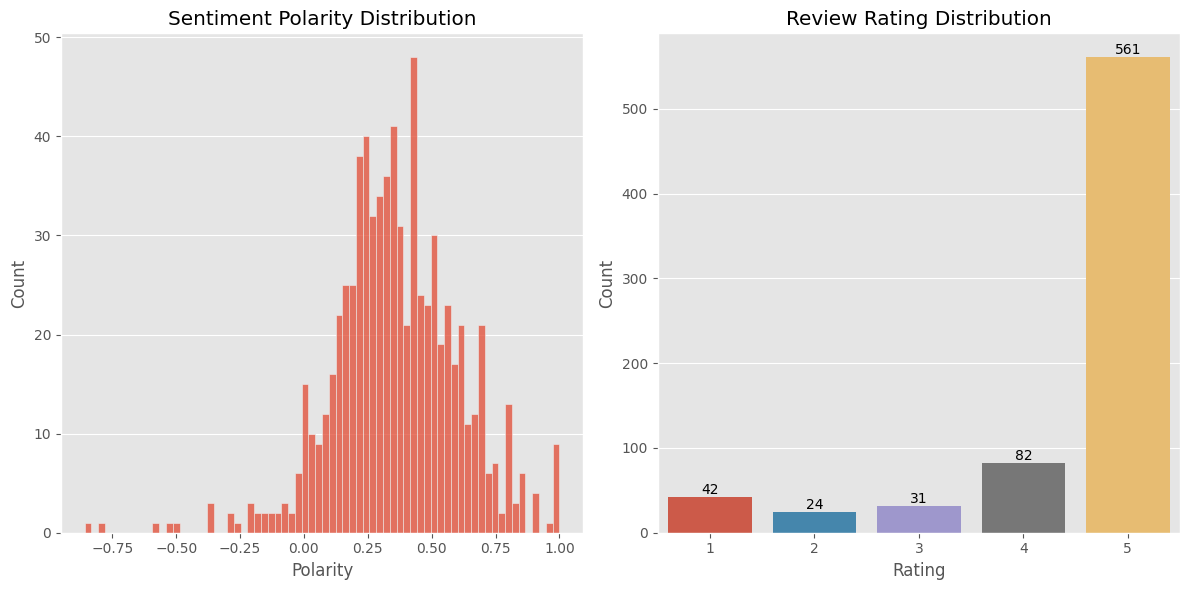

In [52]:
# Rating distribution along with Sentiment polarity (Textblob baseline)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Ratings
sns.countplot(x=df['Rating'], ax=axs[1])
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Count')
axs[1].set_title('Review Rating Distribution')
for i, count in enumerate(df['Rating'].value_counts().sort_index()):
    axs[1].annotate(count, (i, count), ha='center', va='bottom')

# Polarity
sns.histplot(df['TB Polarity'], bins=70, kde=False, ax=axs[0])
axs[0].set_xlabel('Polarity')
axs[0].set_ylabel('Count')
axs[0].set_title('Sentiment Polarity Distribution')
axs[0].grid(axis='x')

plt.tight_layout()
plt.show()

Very biased towards positive reviews.

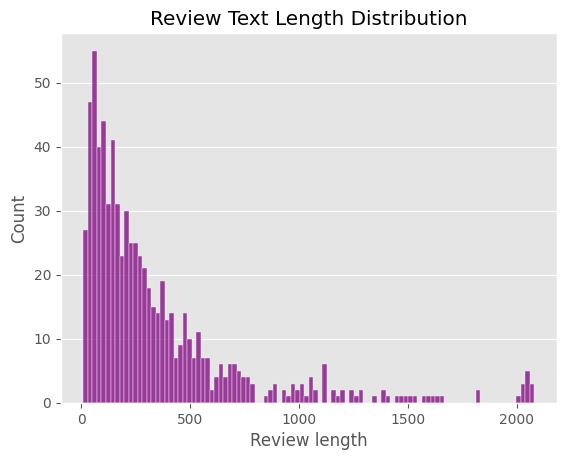

In [53]:
# Review Length Distribution
sns.histplot(df['Review Length'], bins=100, color="purple")
plt.xlabel('Review length')
plt.ylabel('Count')
plt.title('Review Text Length Distribution')
plt.grid(axis='x')
plt.show()

Highly positively skewed distribution where most of the lengths falls between 0-500.

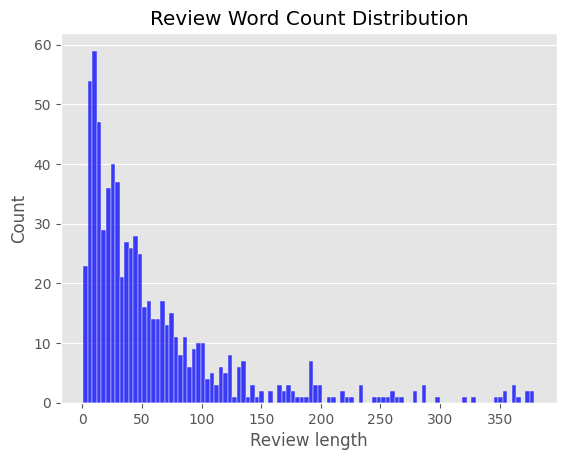

In [54]:
# Review word count Distribution
sns.histplot(df['Word Count'], bins=100, color="blue")
plt.xlabel('Review length')
plt.ylabel('Count')
plt.title('Review Word Count Distribution')
plt.grid(axis='x')
plt.show()

As previously, but most of the reviews are 0 to 50 words long.

Let's take a look now to the not-correctly classified reviews: the positive reviews with a negative TB polarity and viceversa.

In [55]:
# "ironic" reviews that could be difficult for TextBlob to interpret
df[(df['TB Polarity'] < 0) & (df['Rating'] >= 4)][['Review', 'Sentiment', 'TB Polarity', 'Review Length']]

,Review,Sentiment,TB Polarity,Review Length
40,"boom, boom. boom. neighbours hate it.",Positive,-0.800000,37
68,"adds the boom boom.. bought to complement a set of desktop eris e3.5 speakers...this sub hits hard and is very loud. i had to turn the gain all the way down and it's still borderline too loud sometimes. resolved the issue by turning the overall system output volume down and turning the speaker gain up to compensate...i'd recommend connecting the sub / speakers with y-splitters from your source rather than in series, i encountered a ground loop when connected that way.",Positive,-0.062130,472
108,"proper. amazing for fun studio or daily music listening, on logic pro x the bass is a bit weird ngl but on professional mixes and masters this is insane",Positive,-0.081250,152
116,love it!. this speakers are insane.,Positive,-0.187500,35
138,definitely adds oomph. was skeptical whether this would complement my eris e5s. but it definitely fills a gap in my bad acoustic home studio.,Positive,-0.300000,141
203,"presonus eris sub8 compact with gorgeous looks & average performance!. after all the positive reviews about this product, i was so much looking forward to hooking this sub up to my system. however, i was at first very disappointed with the sound quality in general, because it did not deliver the window rattling, lound, punchy, low-end base like some other reviewers had suggested it did! having said that, the addition of this sub will actually drastically improve the overall low end frequencies when paired with the somewhat base-shy presonus e3.5 satellite speakers. for this reason i have to recommend this sub, but please don't expect ear shatteringly loud, punchy low end base because you won't get it! i have my system hooked up to my pc in a small office space just 5'x10' & mainly play music and i need both the sub & speakers set to almost max!.both hpf & 180 deg. swithes located on the rear of the unit make no difference to the sound whatsoever which is a little disappointing & the volume control is also located on the back which some people may also find a tad inconvenient..i was shocked when playing just the sub on its own (satellite speakers turned off) because the lower frequency base notes sounded not only very quiet, but muffled & distorted too! i was hoping for nice loud punchy low end base but didn't get it! having said that - when played together with the satellite speakers the overall sound does seem to come life!.don't be put off by this review because the overall sound is pretty good for the money & its usually true in what they say - ""you get what you pay for""!",Positive,-0.017758,1601
346,"poor low end at first, but give it some time!. these definitely at least 12 hours to start sounding decent.",Positive,-0.044167,107
488,good for price.. can't knock these for the price. i use them to game and listen to music i general and watch movies..not bad as a second pair of reference monitors for music production either. i typically use krk rokit 6s.,Positive,-0.086111,222
567,"top sound. surprisingly good sound. had previously bought a pair of mackie cr3's, and was so unimpressed that i retuned them the same day..after trawling the net i came across these bad boys, and never found a bad review..for the price of these you cannot go wrong",Positive,-0.006667,264
592,it’s crazy. the bass is good,Positive,-0.016667,28


Look at the first one, it is clearly ironic.

In [56]:
df[(df['TB Polarity'] < 0) & (df['Rating'] >= 4)].iloc[0,1]

'boom, boom. boom. neighbours hate it.'

In [57]:
# in the second case i expect a bigger dataset
# in fact
n = len(df[(df['TB Polarity'] > 0) & (df['Rating'] <= 2)])
print(f'We have {n} reviews which are not correctly "classified" as negative according to the TextBlob polarity which is positive.')

We have 39 reviews which are not correctly "classified" as negative according to the TextBlob polarity which is positive.


### WordClouds

In this section are presented 3 different WordClouds, one for each sentiment (Postive, Negative, Neutral).

Which words are the most "popular" among every type of sentiment?

In [58]:
pos_reviews = df[df['Sentiment']=='Positive']['Clean Review']
pos_reviews = ". ".join(pos_reviews)

neu_reviews = df[df['Sentiment']=='Neutral']['Clean Review']
neu_reviews = ". ".join(neu_reviews)

neg_reviews = df[df['Sentiment']=='Negative']['Clean Review']
neg_reviews = ". ".join(neg_reviews)

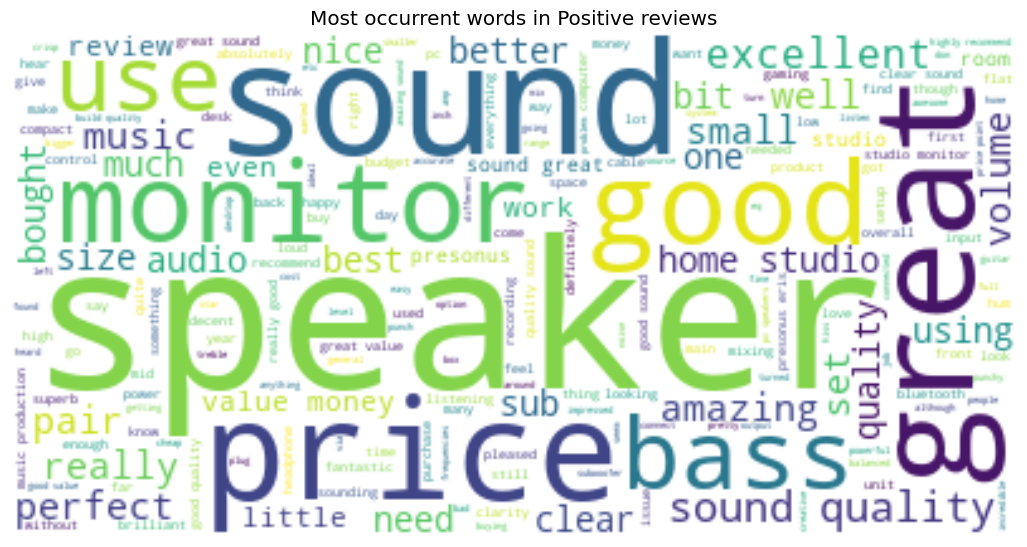

In [59]:
wordcloud = WordCloud(background_color="white", max_words=len(pos_reviews))
wordcloud.generate(pos_reviews)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most occurrent words in Positive reviews")
plt.show()

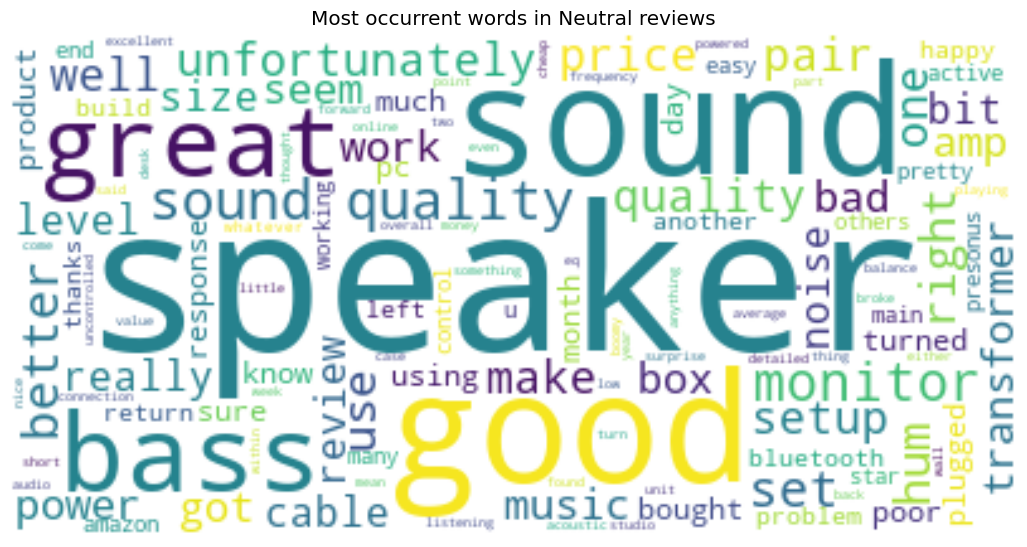

In [60]:
wordcloud = WordCloud(background_color="white", max_words=len(neu_reviews))
wordcloud.generate(neu_reviews)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most occurrent words in Neutral reviews")
plt.show()

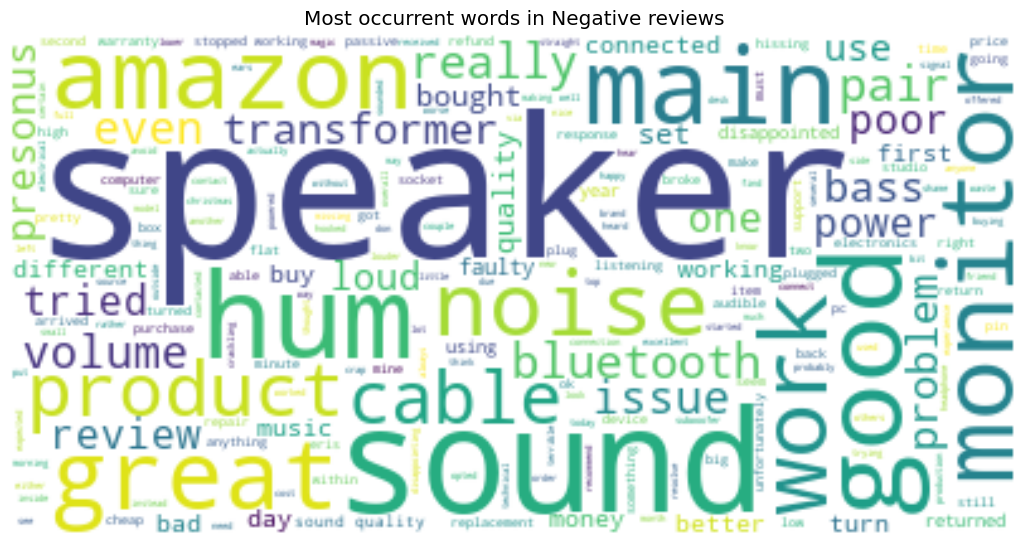

In [61]:
wordcloud = WordCloud(background_color="white", max_words=len(neg_reviews))
wordcloud.generate(neg_reviews)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most occurrent words in Negative reviews")
plt.show()

Wordclouds could be really useful to grasp some ideas of the most occurrent words, but in this case there are no important differences in the words of the 3 images.

### N-gram analysis

Going into a deeper dive into the sentiment analysis, n-grams are contiguous sequences of n words within a text. Analyzing text using n-grams in combination with sentiment analysis can provide valuable insights into the relationship between word sequences and sentiment.

In this section there will be plotted the most frequent uni-bi-trigrams in reviews based on sentiments. The following function is in fact useful to generate and plot the most occurrent n-grams of the various Corpura:
- the first part generates all the n-grams of the Clean reviews column according to the inputted sentiment given.
- the second one plots in a horizontal barplot, according to the given dimension of the n-gram, the most common 10 n-grams with their occurencies.

In [62]:
def ngram_plot(sentiment:str, n):
    tokens = nltk.word_tokenize(" ".join(df[df['Sentiment'] == sentiment.capitalize()]['Clean Review']))         # tokenizing all the strings joined together
    sentiment = sentiment.capitalize()
    
    if n == 1:
        ngram_freq = FreqDist(tokens)
        most_common_unigrams = ngram_freq.most_common(10)
        unigrams = [word for word, _ in most_common_unigrams]
        frequencies = [freq for _, freq in most_common_unigrams]

        plt.barh(unigrams, frequencies, color="blue")
        plt.xlabel('Frequency')
        plt.ylabel('Unigrams')
        plt.title(f'Most common Unigrams in {sentiment} reviews')
        plt.gca().invert_yaxis()  # Invert the y-axis to show higher frequencies at the top
        plt.show()
    
    else:
        grams = list(ngrams(tokens, n))        # using nltk's ngrams function to generate them
        ngram_freq = FreqDist(grams)
        most_common_ngrams = ngram_freq.most_common(10)
        grams = [' '.join(sentence) for sentence, _ in most_common_ngrams]
        frequencies = [freq for _, freq in most_common_ngrams]
        
        if n == 2:
            plt.barh(grams, frequencies, color = "green")
            plt.ylabel('Bigrams')
            plt.title(f'Most common Bigrams in {sentiment} reviews')
        elif n == 3:
            plt.barh(grams, frequencies, color = "purple")
            plt.ylabel('Trigrams')
            plt.title(f'Most common Trigrams in {sentiment} reviews')
        else:
            plt.barh(grams, frequencies, color = "red")
            plt.ylabel(f'{n}-grams')
            plt.title(f'Most common {n}-grams in {sentiment} reviews')
        plt.xlabel('Frequency')
        plt.gca().invert_yaxis()  # Invert the y-axis to show higher frequencies at the top
        plt.show()

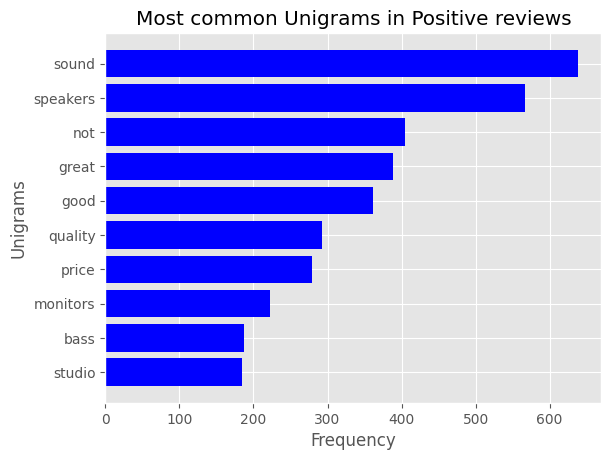

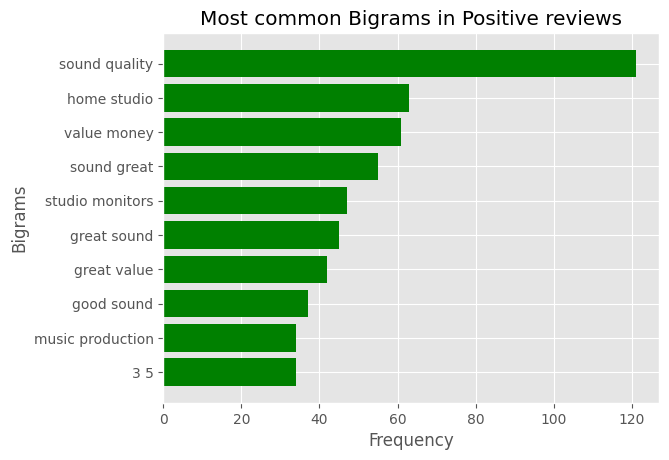

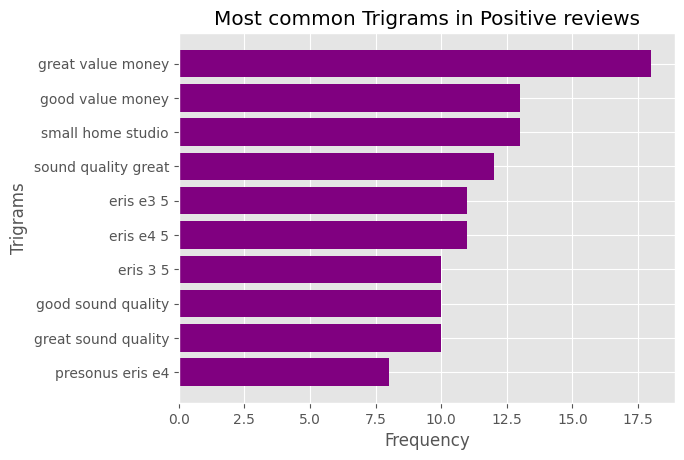

In [63]:
for i in range(1,4):
    ngram_plot('positive', i)

In [64]:
df[["Title", "Content", "Rating"]][(df['Sentiment']=="Positive")&(df['Clean Review'].str.contains("sound|sound quality|greate value money"))].head(10)

,Title,Content,Rating
0,good sound,seem decent build quality and good sound. very happy with purchase.,5
2,its a beauty,love its compact shape and sound,5
3,perfect upgrade for pc audio,"if you ruining cheap pc speakers those will blow your mind. clean sound, small frame, good value for money.",5
4,wonderful monitors,"it's been some years since using any monitors as i use dt770 250's for all my audio work and wow, i'm so pleased i added these to my studio...first the sound...the sound is quite flat which is good as you can accurately eq your sound. the bass is ""even"", meaning that it's there but it's not exaggerated. the mids are very well balanced (they sound great) and the high end is also fairly well balanced and you can get some nice air and snap when eqing. for those that have the bayer dynamic dt770 250's, you'll find your headphones have more ""air"" and snap a bit more in the highs by default, the lower mids probably have a little more punch, but not much. going back and forth between the 770's and the monitors should be a similar(ish) experience...build quality and size..very petit in size, they don't take up much room. the build is absolutely fine for the price. no issues there...you have standard connections by means of speaker wire and phono to 3.5mm (unbalanced). i'd recommend using some trs to trs to help eliminate noise from emf...on the backs you also have access to bass and treble knobs to help tune the sound to your room...on the front you have the power switch and 3.5mm ports for headphones and phone so you can play music from your phone via the correct cable, usually 3.5mm to 3.5mm. just note that the headphone in isn't powerful enough to power 250ohm headphones...overall, these monitors are brilliant and well worth the price.",5
7,brilliant monitor speakers for dj'ing,"absolutely love these speakers - perfect for dj'ing at home and loud enough for a little boogie with the kids. sound quality is great and i'm glad i did my research ahead of time. build quality is really good, the volume pot is nice and smooth...these would be great for home music production or for gaming...well worth the investment.",5
8,very good but not as good as the harman kardon soundticks,very good but not as good as the harman kardon soundticks..though these are smaller overall,4
11,impressive sound quality!,"bought a pair of these for my daughter, so good i kept them and ordered another pair :-)",5
13,excellent,great set of speakers. good quality sound. easy connections. very happy 🙂👍,5
14,perfect compact speakers,"item came next day as promised and packaging was minimal but affective, great to see there was not excessive waste on paper !!..the speakers were very easy to connect, if you were not sure how to connect speakers there was some instructions !..to be honest for the size and price, i was very surprised. i have bang and olufsen speakers from the 90's which at the time cost £300!! they are exceptional so was very dubious of the sound quality albeit they are for my son and his pc/playstation etc.. the sound was actually really sharp and the base was pretty good without any distortion or sound loss. the sound bands were pretty much together and not lost at all..whilst not exactly a match for my b&o, for the price i was so surprised. the sound is so good, and their compact size allows my son to have these on his shelf above him. pretty light weight but they do not compromise on sound..all in all for the price these are a worthy buy",5
15,amazing sound for price,ive been blown away from these speakers for 79.99.they really are studio monitors.may not be the best but are not low quality at all.dont think any speaker in this price point comes closes,5


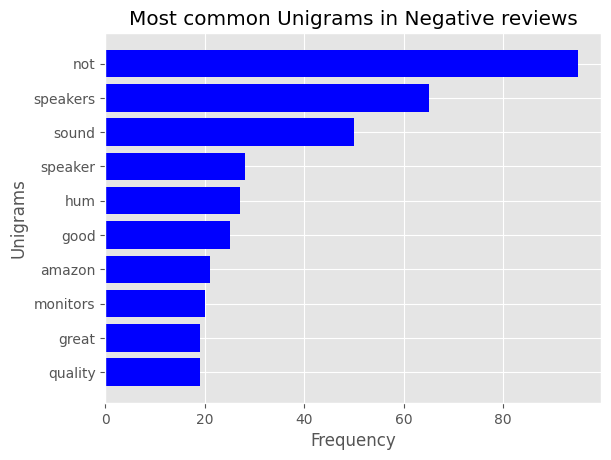

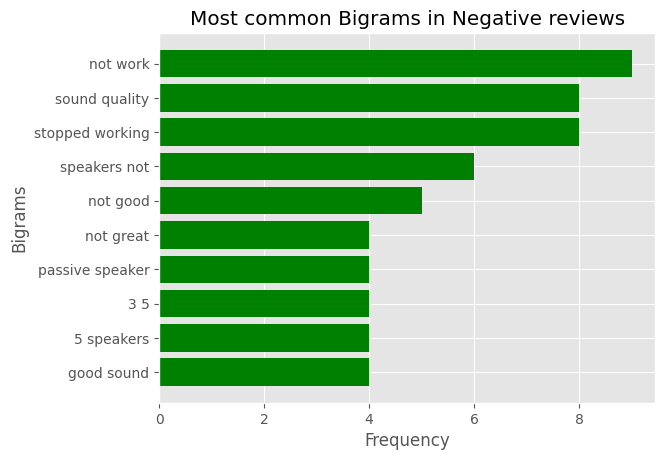

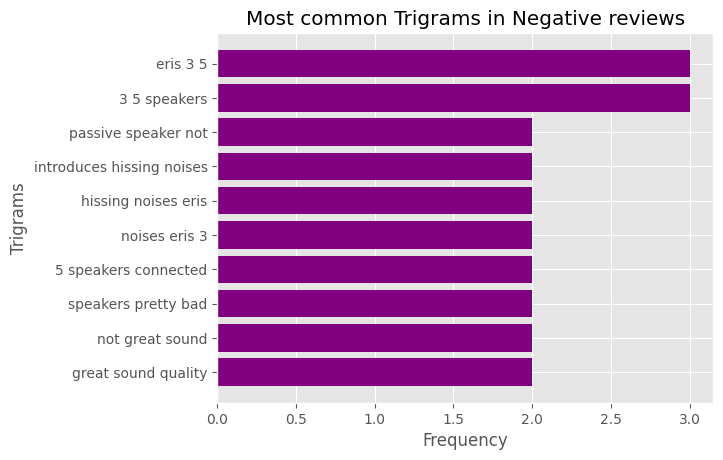

In [65]:
for i in range(1,4):
    ngram_plot('negative', i)

In [66]:
df[["Title", "Content", "Rating"]][(df['Sentiment']=="Negative")&(df['Clean Review'].str.contains("not|not work|eris 3 5"))].head(10)

,Title,Content,Rating
5,not loud enough,these are probably suited for bedroom use and not anything more. the bass kept cutting out with the highs and mids at times also doing the same. not great at all - i opted for krk’s instead!,2
6,faulty,passive speaker won't connect to the main speaker.. faulty.very disappointed,1
9,crackling sound when connected to bluetooth,"i’d like to preface this review by saying i tried 2 different sets of these speakers (both the bluetooth version), brand new, and both had the exact same issue, so must be a model issue rather than a one-off problem...the first pair i bought had a constant crackling/buzzing noise coming from the passive speaker when connected to bluetooth. the noise disappeared when disconnected from bluetooth, but appeared instantly when connected. it was audible at low volumes which ruined the listening experience so i exchanged for another set...this second set had the exact same problem. i tried connecting a different bluetooth device, i tried moving the speakers to different rooms, moving electrical devices away, swapping cables around… but the noise would not disappear no matter what i tried...really disappointing and has massively turned me away from purchasing presonus products again...i started the returns process on 2nd may 2023, posted the item the same day, and still have not had a refund - today is 12th may 2023. would love an update on my refund please?",1
20,badly manufactured!!,"glue missing on the main cone which resulted in bad vibrations and hissing, not happy with the overall build of these monitors, would not recommend to anyone",2
34,virtually unusable due to signal noise,"tl;dr: don’t buy this subwoofer; it’s a terrible product that hums and hisses...i really wanted to love this subwoofer, but it’s basically unusable due to all the noise:..- it always hums when it’s powered on, even if it’s not connected to anything. another reviewer mentioned that’s a problem with the transformer and they fixed it by adding some padding to the transformer themselves. i can’t confirm: i don’t have such technical skills and i don’t think i should be expected to fix such things myself; could be a fire hazard!.- it introduces hissing noises to my eris 3.5 speakers when connected to my computer, even if i use an an external dac. these speakers do not pick up noise if i connect them to my computer directly without the subwoofer..- it introduces hissing noises to my eris 3.5 speakers when connected to my macbook every time i use my magic trackpad or magic keyboard. again, the eris 3.5 speakers do not hiss if not connected through the subwoofer...i have tried resolving the issue by using a power conditioner, and by trying different combinations of devices, cables, and wall sockets, but no joy. none of my other audio products have this problem. i can only conclude that this product has some some faulty or just plain bad electronics inside, maybe the transformer or amplifier...on the rare moments i got it to work without producing too much noise (apart from the hum) for a few moments it seemed to produce good sound, although i am no audiophile.",1
51,arrived damaged.,"i was after a set of smaller monitors for my desktop video editing setup on a recommendation from a friend who has a set, and these fit the bill perfectly. they're loud (surprisingly so!), compact and discreet sat next to my monitors. the sound would normally be excellent i'm sure of it, but unfortunately, the bass woofer on the right side speaker is rattling, even at lower volumes, and there's a distinct rattle when you shake the speaker, so i would assume it's a transit issue. i've mounted the speakers on isolation pads and there's nothing on my desk to cause the noise and the louder you put them, the louder the noise is, so it's definitely the speaker. my friend's setup is pretty much identical to mine, and his sound superb, so i know they're great little monitors, but it's unfortunate that mine are damaged on arrival.

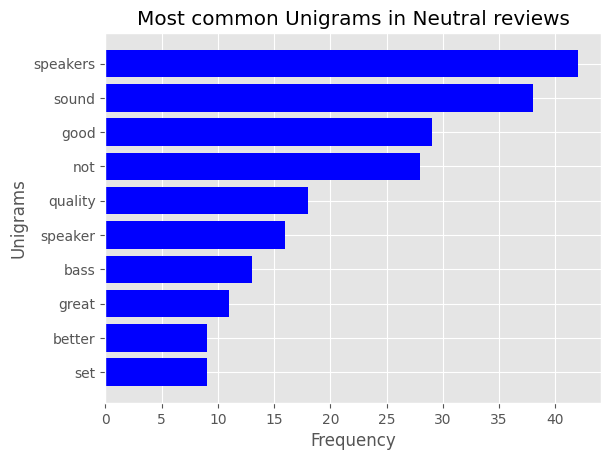

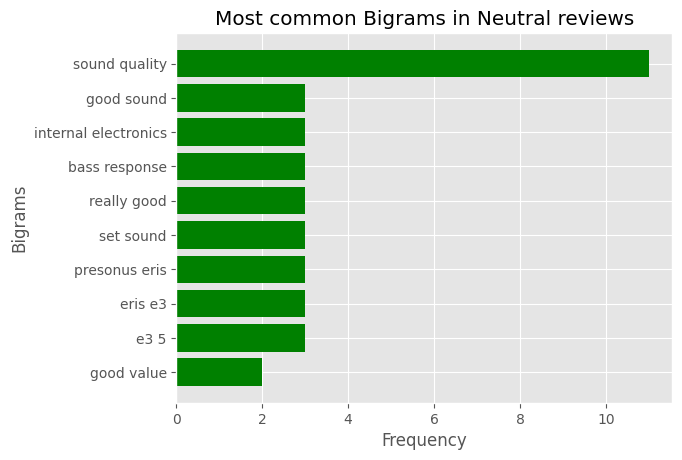

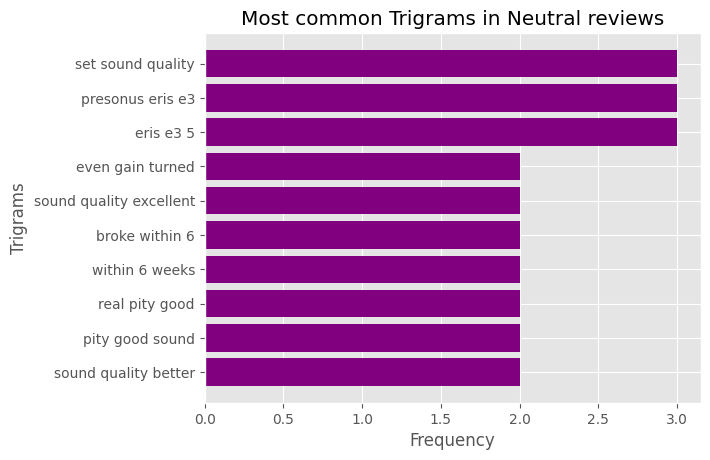

In [67]:
for i in range(1,4):
    ngram_plot('neutral', i)

In [68]:
df[["Title", "Content", "Rating"]][(df['Sentiment']=="Neutral")&(df['Clean Review'].str.contains("speakers|sound quality|set sound quality"))].head(10)

,Title,Content,Rating
59,yeah good value for money,"good speakers for the price..clear, accurate, clean speakers which i bought for improving my day to day audio when wfh and either on teams or listening to music...would a more ‘domestic’ speaker have been better than a speaker trying to be a budget monitor speaker, i don’t know. probably. maybe...but this is good, has bluetooth, works well and got simple controls with minimum fuss.",3
121,great on paper,"had a hum on one of the units and had to return. such a shame as, otherwise the sound quality was excellent. build quality, however, is obviously suspect.",3
212,broke within 6 weeks,"real pity. good sound but internal connections broke within 6 weeks. the speakers had not been moved since setup so i guess the internal electronics were poor. as i said, a real pity.",3
214,good sound quality but bad qc,"i am using it with my macbook pro for general usage, listening to music, video, gaming. the sound quality is better than another m brand similar price speaker. but it did not turn on after a week. have to replace another hardware.",3
216,delighted,"so much better than the audioengine for use as pc speakers and at a third of the cost. couldn’t be more happy so far..edit:.after three months use i know the product better now and have dropped two stars. my use case is for simple pc use: youtube, the odd game, non-critical music listening etc… problem is that the stereo imaging is poor. you can often clearly notice distinct and separate sound out of the left and right channels. perhaps that is how a monitor as opposed to a standard speaker is supposed to work. but it’s no good for my use case.",3
242,unsure about sound quality,"i have these monitors (3.5"") mounted on a couple stands, plugged into a steinberg ur22 via trs...the only other pair of monitors i've owned are the m-audio av30. i seem to recall them having much more crisp sound quality than these, so i'm a little disappointed..the sound comes across as a little muddy and heavy on the low-frequencies, without having the depth of sound of a larger box...the stitching/joining around the centre part of my right speaker also looks pretty rough. will upload a picture and ask for feedback from the seller when i can.",3
337,bass response is nonexistent,"i like these speakers for mixing- i have a small setup (laptop, keyboard controller and the speakers). they give you a really good idea of balancing levels but- it's really difficult to balance bass instruments as there is virtually no bass response. i have to switch to headphones to do that. trying to eq a bass instrument is very difficult on these speakers. if they had a better bass response then i would give 10/10 for this product. the mid, treble and stereo image are very accurate though. i'm still glad i got these speakers though.",3
339,broken right speakers,good thanks,3
351,great but,good quality speakers but the cable connecting them is very weak and broke so i've been just using one for a while,3
352,25 mins and ka-bloey!! replacements working but reliability concerns remain.,"got this item today. sounded good for all of 25 mins when connected via a line in playing music. then buzz, crackle, flash and dead. my assumption is the amp in the left unit has shorted. amazon have been really good and i've risked ordering a replacement. will see what that one is like but at the moment am not impressed..14/07/2021-i now have a working set of speakers (well they've been working 3 days!). sound quality is good. i have good full range hearing and, as such all my devices are set to flat equalisation - and these speakers are set the same. sound quality is great. no ""boomy bass"" that i'd read in other reviews and i've played a selection of music through them from opera to heavy rock to pop and rnb. i'll reset my rating to a 3 from 1 star - not based on the sound quality which is excellent and worthy of 5 stars - but just on my ongoing concerns on longevity and reliability. for referen

From these last plots we can now have a solid idea on, for example, the most loved or hated features of a product: in this case it looks like the customers love the high sound quality the speakers offer given their size and price. On the other side, it looks like that in negative reviews the sound quality is also sometimes criticized and it can happend that the product is damaged or faulty when it arrives the customers.

In [69]:
df.to_csv('G:/Il mio Drive/MAGISTRALE/IT Coding/Project/Sentiment-Analysis-on-Amazon-product-reviews/Data/after_EDA_revs.csv')